In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("StressLevelDataset.csv")

In [7]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [8]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [9]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

# Introducing outliers in anxiety_level

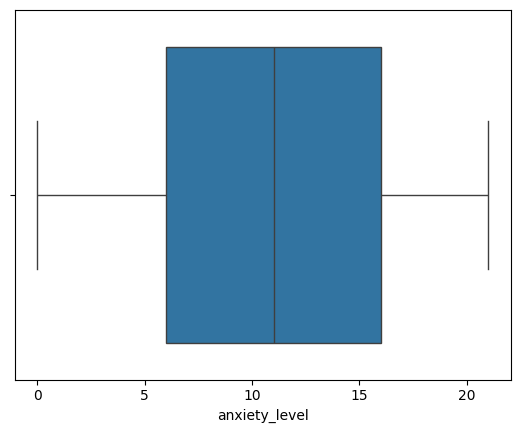

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['anxiety_level'])
plt.show()

In [10]:
df.shape

(1100, 21)

In [18]:
outlier_indices = np.random.choice(len(df), 55, replace=False)
IQR = df['anxiety_level'].quantile(0.75) - df['anxiety_level'].quantile(0.25)
upper_fence = df['anxiety_level'].quantile(0.75) + (1.5 * IQR)
print(IQR, upper_fence)
outlier_array = np.random.randint(32, 51, size=55)
print(outlier_array)
df.loc[outlier_indices, "anxiety_level"] = outlier_array

10.0 31.0
[35 39 37 47 42 35 36 40 38 50 46 38 49 43 35 34 37 39 37 34 33 40 50 40
 45 45 43 50 39 37 50 50 40 50 47 44 35 44 33 42 41 33 32 35 46 34 40 43
 48 41 44 43 49 36 32]


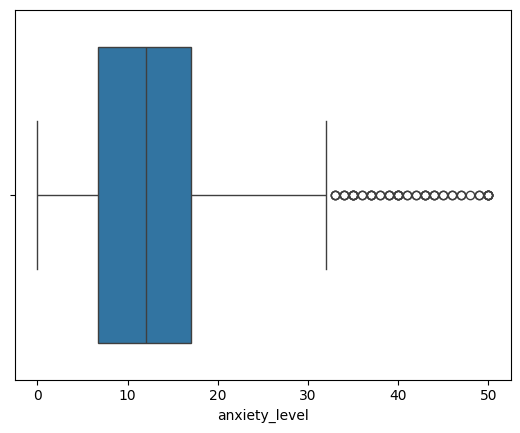

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['anxiety_level'])
plt.show()

# Introducint Outliers in self_esteem

In [25]:
outlier_indices_self_esteem = np.random.choice(len(df), 55, replace=False)
IQR = df['self_esteem'].quantile(0.75) - df['self_esteem'].quantile(0.25)
upper_fence = df['self_esteem'].quantile(0.75) + (1.5 * IQR)
print(IQR, upper_fence)
outlier_array = np.random.randint(48.5, 60, size=55)
print(outlier_array)
df.loc[outlier_indices_self_esteem, "self_esteem"] = outlier_array

15.0 48.5
[59 50 55 48 50 53 52 55 57 49 52 49 56 55 58 58 59 49 58 57 56 56 57 55
 57 56 51 51 56 56 57 50 59 51 50 54 59 59 48 49 55 52 55 54 51 50 53 54
 54 56 56 49 55 51 49]


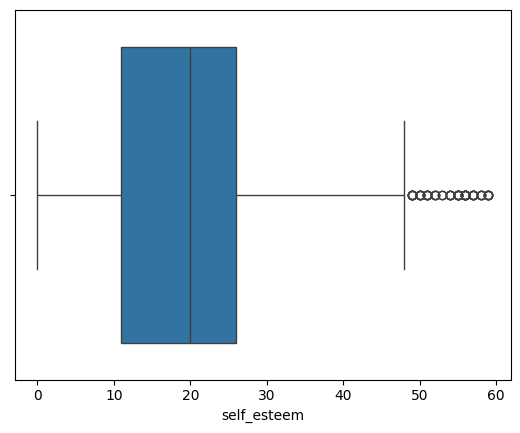

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['self_esteem'])
plt.show()

# Introducing outliers in depression

In [28]:
outlier_indices_depression = np.random.choice(len(df), 55, replace=False)
IQR = df['depression'].quantile(0.75) - df['depression'].quantile(0.25)
upper_fence = df['depression'].quantile(0.75) + (1.5 * IQR)
print(IQR, upper_fence)
outlier_array = np.random.randint(38.5, 50, size=55)
print(outlier_array)
df.loc[outlier_indices_depression, "depression"] = outlier_array

13.0 39.5
[48 40 48 44 48 43 38 49 38 45 40 41 45 47 45 43 45 45 42 47 47 46 42 48
 47 47 44 46 46 43 40 42 45 41 48 39 48 49 43 43 39 38 43 45 46 44 43 49
 41 46 40 45 44 48 49]


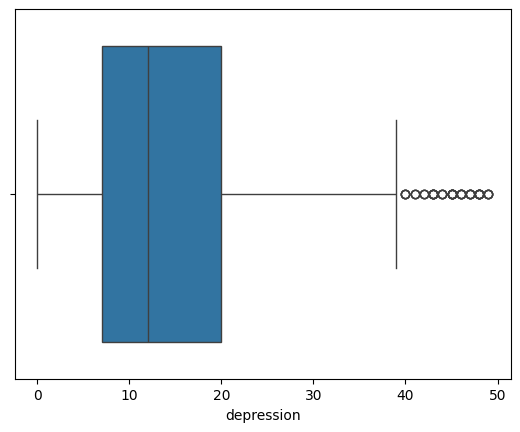

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['depression'])
plt.show()

# Introducing NULL values

In [35]:
def null_values(df, feature):
    null_indices = np.random.choice(len(df), np.random.randint(30, 51), replace=False)
    df.loc[null_indices, feature] = np.nan

In [37]:
null_values(df, 'anxiety_level')
null_values(df, 'self_esteem')
null_values(df, 'depression')

df.isnull().sum()

anxiety_level                   226
self_esteem                      92
mental_health_history             0
depression                       67
headache                          0
blood_pressure                    0
sleep_quality                     0
breathing_problem                 0
noise_level                       0
living_conditions                 0
safety                            0
basic_needs                       0
academic_performance              0
study_load                        0
teacher_student_relationship      0
future_career_concerns            0
social_support                    0
peer_pressure                     0
extracurricular_activities        0
bullying                          0
stress_level                      0
dtype: int64